In [1]:
!pip install torch torchvision torchaudio
!pip install git+https://github.com/openai/CLIP.git
!pip install diffusers transformers accelerate
!pip install potracer # Install the Python package for potrace
!pip install reportlab
# Install compatible Torch version
!pip install torch==1.10.0 torchvision==0.11.1 torchaudio==0.10.0
# Install CLIP
!pip install git+https://github.com/openai/CLIP.git



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 108.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 89.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 92.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [2]:
import torch
import clip
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from diffusers import StableDiffusionPipeline
# Other imports...
import potrace # use potracer for python imports instead of potrace
# Remaining imports...
from reportlab.pdfgen import canvas  # For PDF saving


In [3]:
import torch
import clip
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from diffusers import StableDiffusionPipeline, DDIMScheduler
# Other imports...
import potrace # use potracer for python imports instead of potrace
# Remaining imports...
from reportlab.pdfgen import canvas  # For PDF saving

device = "cuda" if torch.cuda.is_available() else "cpu"

# Load CLIP model
model, preprocess = clip.load("ViT-B/32", device=device)

# Load Stable Diffusion model
# Increased timeout for downloading the model
pipeline = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    # revision="fp16",  # Remove or replace with a valid revision if needed
    torch_dtype=torch.float16,
    timeout=60  # Increase timeout to 60 seconds (or more if needed)
).to(device)

100%|███████████████████████████████████████| 338M/338M [00:12<00:00, 27.7MiB/s]
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Keyword arguments {'timeout': 60} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [4]:
!pip install svgwrite
!pip install cairosvg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.8 MB/s eta 0:00:00


In [ ]:
import torch
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from diffusers import StableDiffusionPipeline, DDIMScheduler
import potrace  # Converts raster images to vector SVG
import svgwrite  # For SVG generation
import cairosvg  # For converting SVG to other formats

# Define standard icon sizes
ICON_SIZES = {
    "small": (32, 32),
    "medium": (64, 64),
    "large": (128, 128),
    "xlarge": (256, 256),
    "mobile": (512, 512),
    "app_store": (1024, 1024)
}

# Define color options in HEX format
ICON_COLORS = {
    "black": "#000000",
    "white": "#FFFFFF",
    "red": "#FF0000",
    "blue": "#0000FF",
    "yellow": "#FFFF00"
}

# Define icon styles
ICON_STYLES = ["outline", "filled", "gradient"]

def generate_icon():
    """Generates AI-generated 2D & 3D icons and saves them as transparent PNG, WEBP, PDF, and SVG."""

    # User input for customization
    prompt = input("Enter your icon description (e.g., 'Simple camera icon, vector style'): ")
    size_option = input("Choose size (small, medium, large, xlarge, mobile, app_store): ").lower()
    border_color_option = input("Choose border color (black, red, blue, yellow): ").lower()
    style_option = input("Choose icon style (outline, filled, gradient): ").lower()
    num_icons = int(input("How many icons to generate? "))  # Number of icons to generate
    filename = input("Enter a custom filename (optional, press enter to use default): ")

    size = ICON_SIZES.get(size_option, (256, 256))  # Default: 256x256
    border_color = ICON_COLORS.get(border_color_option, "#000000")  # Default: black
    style = style_option if style_option in ICON_STYLES else "outline"

    if not filename:
        filename = f"icon_{size[0]}x{size[1]}_{style}"

    # Check device availability
    device = "cuda" if torch.cuda.is_available() else "cpu"

    # Load Stable Diffusion model
    pipeline = StableDiffusionPipeline.from_pretrained(
        "stabilityai/stable-diffusion-2-1",
        torch_dtype=torch.float16,
        revision="fp16"
    ).to(device)

    def process_image(image, name):
        """Converts AI-generated image to SVG, PNG, WEBP, and PDF formats with a transparent background."""

        image = image.convert("L")  # Convert to grayscale
        image_np = np.array(image)
        _, binary_image = cv2.threshold(image_np, 128, 255, cv2.THRESH_BINARY)  # Binarization

        # Convert to SVG using potrace
        bitmap = potrace.Bitmap(binary_image > 128)
        path = bitmap.trace()

        svg_path = f"{name}.svg"
        dwg = svgwrite.Drawing(svg_path, size=(size[0], size[1]), profile='tiny')

        # Draw the icon outline with border color (no background for transparency)
        for curve in path:
            d_path = f'M {curve.start_point.x},{curve.start_point.y} '
            for segment in curve:
                if isinstance(segment, potrace.BezierSegment):
                    d_path += f'C {segment.c1.x},{segment.c1.y} {segment.c2.x},{segment.c2.y} {segment.end_point.x},{segment.end_point.y} '
                elif isinstance(segment, potrace.CornerSegment):
                    d_path += f'L {segment.c.x},{segment.c.y} L {segment.end_point.x},{segment.end_point.y} '
            dwg.add(dwg.path(d=d_path, fill="none", stroke=border_color, stroke_width=2))  # Only border color applied

        dwg.save()

        # Save in multiple formats (PNG, WEBP, PDF) with a transparent background
        png_path = f"{name}.png"
        webp_path = f"{name}.webp"
        pdf_path = f"{name}.pdf"

        cairosvg.svg2png(url=svg_path, write_to=png_path, background_color=None)  # Transparent PNG
        cairosvg.svg2png(url=svg_path, write_to=webp_path, background_color=None)  # Transparent WEBP
        cairosvg.svg2pdf(url=svg_path, write_to=pdf_path)  # Transparent PDF

        return {"png": png_path, "webp": webp_path, "pdf": pdf_path, "svg": svg_path}

    all_outputs = []

    for i in range(num_icons):
        print(f"🔄 Generating icon {i+1} of {num_icons}...")

        # Generate 2D Icon
        prompt_2d = f"{prompt}, minimalistic, {style} design, vector style, 2D icon"
        image_2d = pipeline(prompt_2d, guidance_scale=12).images[0]
        image_2d = image_2d.resize(size, Image.LANCZOS)

        # Generate 3D Icon
        prompt_3d = f"{prompt}, highly detailed, 3D render, isometric, futuristic lighting, {style}"
        image_3d = pipeline(prompt_3d, guidance_scale=12).images[0]
        image_3d = image_3d.resize(size, Image.LANCZOS)

        # Process & save 2D & 3D icons
        output_2d = process_image(image_2d, f"{filename}_2d_{i+1}")
        output_3d = process_image(image_3d, f"{filename}_3d_{i+1}")

        all_outputs.append({"2D_icon": output_2d, "3D_icon": output_3d})

    print(f"✅ {num_icons} Icons saved in {size[0]}x{size[1]} resolution with transparent background in PNG, WEBP, PDF & SVG!")

    return all_outputs

# Run the function
output_files = generate_icon()

print("Generated Icon Files:", output_files)


Enter your icon description (e.g., 'Simple camera icon, vector style'): cat face
Choose size (small, medium, large, xlarge, mobile, app_store): large
Choose border color (black, red, blue, yellow): black
Choose icon style (outline, filled, gradient): filled
How many icons to generate? 10
Enter a custom filename (optional, press enter to use default): catface10


model_index.json:   0%|          | 0.00/517 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/diffusers/pipelines/pipeline_loading_utils.py:242: FutureWarning: You are loading the variant fp16 from stabilityai/stable-diffusion-2-1 via `revision='fp16'` even though you can load it via `variant=`fp16`. Loading model variants via `revision='fp16'` is deprecated and will be removed in diffusers v1. Please use `variant='fp16'` instead.
  warnings.warn(


Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

scheduler_config.json:   0%|          | 0.00/351 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/628 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/681M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/819 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/999 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/1.73G [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


🔄 Generating icon 1 of 10...


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

🔄 Generating icon 2 of 10...


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

🔄 Generating icon 3 of 10...


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

🔄 Generating icon 4 of 10...


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

🔄 Generating icon 5 of 10...


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

🔄 Generating icon 6 of 10...


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

🔄 Generating icon 7 of 10...


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

🔄 Generating icon 8 of 10...


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

🔄 Generating icon 9 of 10...


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

🔄 Generating icon 10 of 10...


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

✅ 10 Icons saved in 128x128 resolution with transparent background in PNG, WEBP, PDF & SVG!
Generated Icon Files: [{'2D_icon': {'png': 'catface10_2d_1.png', 'webp': 'catface10_2d_1.webp', 'pdf': 'catface10_2d_1.pdf', 'svg': 'catface10_2d_1.svg'}, '3D_icon': {'png': 'catface10_3d_1.png', 'webp': 'catface10_3d_1.webp', 'pdf': 'catface10_3d_1.pdf', 'svg': 'catface10_3d_1.svg'}}, {'2D_icon': {'png': 'catface10_2d_2.png', 'webp': 'catface10_2d_2.webp', 'pdf': 'catface10_2d_2.pdf', 'svg': 'catface10_2d_2.svg'}, '3D_icon': {'png': 'catface10_3d_2.png', 'webp': 'catface10_3d_2.webp', 'pdf': 'catface10_3d_2.pdf', 'svg': 'catface10_3d_2.svg'}}, {'2D_icon': {'png': 'catface10_2d_3.png', 'webp': 'catface10_2d_3.webp', 'pdf': 'catface10_2d_3.pdf', 'svg': 'catface10_2d_3.svg'}, '3D_icon': {'png': 'catface10_3d_3.png', 'webp': 'catface10_3d_3.webp', 'pdf': 'catface10_3d_3.pdf', 'svg': 'catface10_3d_3.svg'}}, {'2D_icon': {'png': 'catface10_2d_4.png', 'webp': 'catface10_2d_4.webp', 'pdf': 'catface10_2d

In [ ]:
import torch
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from diffusers import StableDiffusionPipeline, DDIMScheduler
import potrace
import svgwrite
import cairosvg

# Define standard icon sizes
ICON_SIZES = {
    "small": (32, 32),
    "medium": (64, 64),
    "large": (128, 128),
    "xlarge": (256, 2056),
    "mobile": (512, 512),
    "app_store": (1024, 1024)
}

# Define color options in HEX format (not used in this version)
ICON_COLORS = {
    "black": "#000000",
    "white": "#FFFFFF",
    "red": "#FF0000",
    "blue": "#0000FF",
    "yellow": "#FFFF00"
}

# Define icon styles
ICON_STYLES = ["outline", "filled", "gradient"]

def generate_icon():
    """Generates AI-generated color icons and saves them as PNG, WEBP, PDF, and SVG."""

    # User input for customization
    prompt = input("Enter your icon description (e.g., 'A vibrant sun icon, detailed'): ")
    size_option = input("Choose size (small, medium, large, xlarge, mobile, app_store): ").lower()
    style_option = input("Choose icon style (outline, filled, gradient): ").lower()
    num_icons = int(input("How many icons to generate? "))
    filename = input("Enter a custom filename (optional, press enter to use default): ")

    size = ICON_SIZES.get(size_option, (256, 256))
    style = style_option if style_option in ICON_STYLES else "filled"  # Default to filled for color icons

    if not filename:
        filename = f"icon_{size[0]}x{size[1]}_{style}"

    # Check device availability
    device = "cuda" if torch.cuda.is_available() else "cpu"

    # Load Stable Diffusion model
    scheduler = DDIMScheduler.from_pretrained("proximasanfinetuning/fantassified_icons_v2", subfolder="scheduler")
    pipeline = StableDiffusionPipeline.from_pretrained("proximasanfinetuning/fantassified_icons_v2", scheduler=scheduler).to(device)

    def process_image(image, name):
        """Saves the AI-generated color image as PNG, WEBP, PDF, and SVG."""

        # Save in multiple formats (PNG, WEBP, PDF)
        png_path = f"{name}.png"
        webp_path = f"{name}.webp"
        pdf_path = f"{name}.pdf"

        image.save(png_path)
        image.save(webp_path, "webp")

        # Convert to SVG (simplified for color icons, might not be perfect)
        svg_path = f"{name}.svg"
        dwg = svgwrite.Drawing(svg_path, size=(size[0], size[1]))

        # This is a basic conversion; for complex color images, a more advanced approach might be needed
        # It essentially embeds the PNG as a base64 encoded image in the SVG
        import base64
        with open(png_path, "rb") as image_file:
            encoded_string = base64.b64encode(image_file.read()).decode()
        dwg.add(dwg.image(href=f"data:image/png;base64,{encoded_string}", insert=(0, 0), size=(size[0], size[1])))
        dwg.save()

        cairosvg.svg2pdf(url=svg_path, write_to=pdf_path)

        return {"png": png_path, "webp": webp_path, "pdf": pdf_path, "svg": svg_path}

    all_outputs = []

    for i in range(num_icons):
        print(f"🔄 Generating icon {i+1} of {num_icons}...")

        # Generate icon
        prompt_icon = f"{prompt}, {style} design, high quality"
        images_icon = pipeline(prompt_icon, num_images_per_prompt=1, num_inference_steps=25).images
        image_icon = images_icon[0]
        image_icon = image_icon.resize(size, Image.LANCZOS)

        # Process & save icon
        output_icon = process_image(image_icon, f"{filename}_{i+1}")

        all_outputs.append({"icon": output_icon})

    print(f"✅ {num_icons} Icons saved in {size[0]}x{size[1]} resolution in PNG, WEBP, PDF & SVG!")

    return all_outputs

# Run the function
output_files = generate_icon()
print("Generated Icon Files:", output_files)

Enter your icon description (e.g., 'A vibrant sun icon, detailed'): cat face
Choose size (small, medium, large, xlarge, mobile, app_store): large
Choose icon style (outline, filled, gradient): filled
How many icons to generate? 5
Enter a custom filename (optional, press enter to use default): catie5


scheduler_config.json:   0%|          | 0.00/597 [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/598 [00:00<?, ?B/s]

Fetching 14 files:   0%|          | 0/14 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/4.58k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/520 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.55k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/582 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


🔄 Generating icon 1 of 5...


  0%|          | 0/25 [00:00<?, ?it/s]

🔄 Generating icon 2 of 5...


  0%|          | 0/25 [00:00<?, ?it/s]

🔄 Generating icon 3 of 5...


  0%|          | 0/25 [00:00<?, ?it/s]

🔄 Generating icon 4 of 5...


  0%|          | 0/25 [00:00<?, ?it/s]

🔄 Generating icon 5 of 5...


  0%|          | 0/25 [00:00<?, ?it/s]

✅ 5 Icons saved in 128x128 resolution in PNG, WEBP, PDF & SVG!
Generated Icon Files: [{'icon': {'png': 'catie5_1.png', 'webp': 'catie5_1.webp', 'pdf': 'catie5_1.pdf', 'svg': 'catie5_1.svg'}}, {'icon': {'png': 'catie5_2.png', 'webp': 'catie5_2.webp', 'pdf': 'catie5_2.pdf', 'svg': 'catie5_2.svg'}}, {'icon': {'png': 'catie5_3.png', 'webp': 'catie5_3.webp', 'pdf': 'catie5_3.pdf', 'svg': 'catie5_3.svg'}}, {'icon': {'png': 'catie5_4.png', 'webp': 'catie5_4.webp', 'pdf': 'catie5_4.pdf', 'svg': 'catie5_4.svg'}}, {'icon': {'png': 'catie5_5.png', 'webp': 'catie5_5.webp', 'pdf': 'catie5_5.pdf', 'svg': 'catie5_5.svg'}}]


In [ ]:
import torch
import numpy as np
from PIL import Image
from diffusers import StableDiffusionPipeline, DDIMScheduler
import svgwrite
import cairosvg
import base64
import os

# Define standard icon sizes
ICON_SIZES = {
    "small": (32, 32),
    "medium": (64, 64),
    "large": (128, 128),
    "xlarge": (256, 256),
    "mobile": (512, 512),
    "app_store": (1024, 1024)
}

# Define icon styles
ICON_STYLES = ["outline", "filled", "gradient", "sketch", "pixel art", "3d"]

def generate_icon():
    """Generates AI-generated icons in different variations and saves them as PNG, WEBP, PDF, and SVG."""

    # User input for customization
    prompt = input("Enter your icon description (e.g., 'A vibrant sun icon, detailed'): ")
    size_option = input("Choose size (small, medium, large, xlarge, mobile, app_store): ").lower()
    num_icons = int(input("How many icons to generate? "))
    filename = input("Enter a custom filename (optional, press enter to use default): ")
    extensions = input("Choose extensions (png, svg, webp, jpg, pdf, all): ").lower().split(",")

    size = ICON_SIZES.get(size_option, (256, 256))

    if not filename:
        filename = f"icon_{size[0]}x{size[1]}"

    # Check device availability
    device = "cuda" if torch.cuda.is_available() else "cpu"

    # Load Stable Diffusion model
    scheduler = DDIMScheduler.from_pretrained("proximasanfinetuning/fantassified_icons_v2", subfolder="scheduler")
    pipeline = StableDiffusionPipeline.from_pretrained("proximasanfinetuning/fantassified_icons_v2", scheduler=scheduler).to(device)

    def process_image(image, name):
        """Saves the AI-generated image in the selected formats."""

        saved_files = {}
        png_path = None  # Initialize png_path to None

        if "png" in extensions or "all" in extensions:
            png_path = f"{name}.png"  # Assign value to png_path if condition is met
            image.save(png_path)
            saved_files["png"] = png_path

        if "webp" in extensions or "all" in extensions:
            webp_path = f"{name}.webp"
            image.save(webp_path, "webp")
            saved_files["webp"] = webp_path

        if "jpg" in extensions or "all" in extensions:
            jpg_path = f"{name}.jpg"
            image.save(jpg_path)
            saved_files["jpg"] = jpg_path

        if "pdf" in extensions or "all" in extensions:
            pdf_path = f"{name}.pdf"
            # For PDF, we first save as PNG, then convert
            temp_png_path = f"{name}_temp.png"
            image.save(temp_png_path)
            cairosvg.svg2pdf(url=temp_png_path, write_to=pdf_path)
            os.remove(temp_png_path)  # Remove the temporary PNG
            saved_files["pdf"] = pdf_path

        if "svg" in extensions or "all" in extensions:
            if png_path is None:  # Check if png_path was assigned
                png_path = f"{name}.png"  # Create a PNG file for SVG embedding
                image.save(png_path)
                saved_files["png"] = png_path  # Add png_path to saved_files

            svg_path = f"{name}.svg"
            dwg = svgwrite.Drawing(svg_path, size=(size[0], size[1]))
            # For SVG, we embed the PNG data
            with open(png_path, "rb") as image_file:
                encoded_string = base64.b64encode(image_file.read()).decode()
            dwg.add(dwg.image(href=f"data:image/png;base64,{encoded_string}", insert=(0, 0), size=(size[0], size[1])))
            dwg.save()
            saved_files["svg"] = svg_path

        return saved_files

    all_outputs = []

    for i in range(num_icons):
        print(f"🔄 Generating icon {i+1} of {num_icons}...")

        for style in ICON_STYLES:
            print(f"  Generating {style} variation...")
            prompt_icon = f"{prompt}, {style} design, high quality"
            images_icon = pipeline(prompt_icon, num_images_per_prompt=1, num_inference_steps=25).images
            image_icon = images_icon[0]
            image_icon = image_icon.resize(size, Image.LANCZOS)

            # Process & save icon
            output_icon = process_image(image_icon, f"{filename}_{i+1}_{style}")
            all_outputs.append({"icon": output_icon, "style": style})

    print(f"✅ {num_icons * len(ICON_STYLES)} Icons saved in {size[0]}x{size[1]} resolution!")

    return all_outputs

# Run the function
output_files = generate_icon()
print("Generated Icon Files:", output_files)

Enter your icon description (e.g., 'A vibrant sun icon, detailed'): tom and jerry
Choose size (small, medium, large, xlarge, mobile, app_store): xlarge
How many icons to generate? 10
Enter a custom filename (optional, press enter to use default): tom10
Choose extensions (png, svg, webp, jpg, pdf, all): jpg


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

🔄 Generating icon 1 of 10...
  Generating outline variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating filled variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating gradient variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating sketch variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating pixel art variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating 3d variation...


  0%|          | 0/25 [00:00<?, ?it/s]

🔄 Generating icon 2 of 10...
  Generating outline variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating filled variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating gradient variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating sketch variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating pixel art variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating 3d variation...


  0%|          | 0/25 [00:00<?, ?it/s]

🔄 Generating icon 3 of 10...
  Generating outline variation...


  0%|          | 0/25 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


  Generating filled variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating gradient variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating sketch variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating pixel art variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating 3d variation...


  0%|          | 0/25 [00:00<?, ?it/s]

🔄 Generating icon 4 of 10...
  Generating outline variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating filled variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating gradient variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating sketch variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating pixel art variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating 3d variation...


  0%|          | 0/25 [00:00<?, ?it/s]

🔄 Generating icon 5 of 10...
  Generating outline variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating filled variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating gradient variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating sketch variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating pixel art variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating 3d variation...


  0%|          | 0/25 [00:00<?, ?it/s]

🔄 Generating icon 6 of 10...
  Generating outline variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating filled variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating gradient variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating sketch variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating pixel art variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating 3d variation...


  0%|          | 0/25 [00:00<?, ?it/s]

🔄 Generating icon 7 of 10...
  Generating outline variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating filled variation...


  0%|          | 0/25 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


  Generating gradient variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating sketch variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating pixel art variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating 3d variation...


  0%|          | 0/25 [00:00<?, ?it/s]

🔄 Generating icon 8 of 10...
  Generating outline variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating filled variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating gradient variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating sketch variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating pixel art variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating 3d variation...


  0%|          | 0/25 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


🔄 Generating icon 9 of 10...
  Generating outline variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating filled variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating gradient variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating sketch variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating pixel art variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating 3d variation...


  0%|          | 0/25 [00:00<?, ?it/s]

🔄 Generating icon 10 of 10...
  Generating outline variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating filled variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating gradient variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating sketch variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating pixel art variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating 3d variation...


  0%|          | 0/25 [00:00<?, ?it/s]

✅ 60 Icons saved in 256x256 resolution!
Generated Icon Files: [{'icon': {'jpg': 'tom10_1_outline.jpg'}, 'style': 'outline'}, {'icon': {'jpg': 'tom10_1_filled.jpg'}, 'style': 'filled'}, {'icon': {'jpg': 'tom10_1_gradient.jpg'}, 'style': 'gradient'}, {'icon': {'jpg': 'tom10_1_sketch.jpg'}, 'style': 'sketch'}, {'icon': {'jpg': 'tom10_1_pixel art.jpg'}, 'style': 'pixel art'}, {'icon': {'jpg': 'tom10_1_3d.jpg'}, 'style': '3d'}, {'icon': {'jpg': 'tom10_2_outline.jpg'}, 'style': 'outline'}, {'icon': {'jpg': 'tom10_2_filled.jpg'}, 'style': 'filled'}, {'icon': {'jpg': 'tom10_2_gradient.jpg'}, 'style': 'gradient'}, {'icon': {'jpg': 'tom10_2_sketch.jpg'}, 'style': 'sketch'}, {'icon': {'jpg': 'tom10_2_pixel art.jpg'}, 'style': 'pixel art'}, {'icon': {'jpg': 'tom10_2_3d.jpg'}, 'style': '3d'}, {'icon': {'jpg': 'tom10_3_outline.jpg'}, 'style': 'outline'}, {'icon': {'jpg': 'tom10_3_filled.jpg'}, 'style': 'filled'}, {'icon': {'jpg': 'tom10_3_gradient.jpg'}, 'style': 'gradient'}, {'icon': {'jpg': 'tom10

In [ ]:
import torch
import numpy as np
from PIL import Image
from diffusers import StableDiffusionPipeline, DDIMScheduler
import svgwrite
import cairosvg
import base64
import os

# Define icon styles
ICON_STYLES = ["outline", "filled", "gradient", "sketch", "pixel art", "3d"]

def generate_icon():
    """Generates AI-generated icons in different variations and saves them as specified formats (excluding PNG)."""

    # User input for customization
    prompt = input("Enter your icon description (e.g., 'A vibrant sun icon, detailed'): ")
    height = int(input("Enter height: "))
    width = int(input("Enter width: "))
    num_icons = int(input("How many icons to generate? "))
    filename = input("Enter a custom filename (optional, press enter to use default): ")
    extensions = input("Choose extensions (svg, webp, jpg, pdf, all): ").lower().split(",")

    size = (width, height)

    if not filename:
        filename = f"icon_{width}x{height}"

    # Check device availability
    device = "cuda" if torch.cuda.is_available() else "cpu"

    # Load Stable Diffusion model
    scheduler = DDIMScheduler.from_pretrained("proximasanfinetuning/fantassified_icons_v2", subfolder="scheduler")
    pipeline = StableDiffusionPipeline.from_pretrained("proximasanfinetuning/fantassified_icons_v2", scheduler=scheduler).to(device)

    def process_image(image, name):
        """Saves the AI-generated image in the selected formats (excluding PNG)."""

        saved_files = {}

        if "webp" in extensions or "all" in extensions:
            webp_path = f"{name}.webp"
            image.save(webp_path, "webp")
            saved_files["webp"] = webp_path

        if "jpg" in extensions or "all" in extensions:
            jpg_path = f"{name}.jpg"
            image.save(jpg_path)
            saved_files["jpg"] = jpg_path

        if "pdf" in extensions or "all" in extensions:
            pdf_path = f"{name}.pdf"
            # For PDF, we first save as PNG, then convert
            temp_png_path = f"{name}_temp.png"
            image.save(temp_png_path)
            cairosvg.svg2pdf(url=temp_png_path, write_to=pdf_path)
            os.remove(temp_png_path)  # Remove the temporary PNG
            saved_files["pdf"] = pdf_path

        if "svg" in extensions or "all" in extensions:
            png_path = f"{name}_temp_svg.png" # Create a temp png for SVG embedding
            image.save(png_path)
            svg_path = f"{name}.svg"
            dwg = svgwrite.Drawing(svg_path, size=(size[0], size[1]))
            # For SVG, we embed the PNG data
            with open(png_path, "rb") as image_file:
                encoded_string = base64.b64encode(image_file.read()).decode()
            dwg.add(dwg.image(href=f"data:image/png;base64,{encoded_string}", insert=(0, 0), size=(size[0], size[1])))
            dwg.save()
            os.remove(png_path) # Remove the temp png
            saved_files["svg"] = svg_path

        return saved_files

    all_outputs = []

    for i in range(num_icons):
        print(f"🔄 Generating icon {i+1} of {num_icons}...")

        for style in ICON_STYLES:
            print(f"  Generating {style} variation...")
            prompt_icon = f"{prompt}, {style} design, high quality"
            images_icon = pipeline(prompt_icon, num_images_per_prompt=1, num_inference_steps=25).images
            image_icon = images_icon[0]
            image_icon = image_icon.resize(size, Image.LANCZOS)

            # Process & save icon
            output_icon = process_image(image_icon, f"{filename}_{i+1}_{style}")
            all_outputs.append({"icon": output_icon, "style": style})

    print(f"✅ {num_icons * len(ICON_STYLES)} Icons saved in {size[0]}x{size[1]} resolution!")

    return all_outputs

# Run the function
output_files = generate_icon()
print("Generated Icon Files:", output_files)

Enter your icon description (e.g., 'A vibrant sun icon, detailed'): a boy sitting on a chair and having cup of coffee
Enter height: 585
Enter width: 1520
How many icons to generate? 10
Enter a custom filename (optional, press enter to use default): boy10
Choose extensions (svg, webp, jpg, pdf, all): jpg


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

🔄 Generating icon 1 of 10...
  Generating outline variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating filled variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating gradient variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating sketch variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating pixel art variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating 3d variation...


  0%|          | 0/25 [00:00<?, ?it/s]

🔄 Generating icon 2 of 10...
  Generating outline variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating filled variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating gradient variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating sketch variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating pixel art variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating 3d variation...


  0%|          | 0/25 [00:00<?, ?it/s]

🔄 Generating icon 3 of 10...
  Generating outline variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating filled variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating gradient variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating sketch variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating pixel art variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating 3d variation...


  0%|          | 0/25 [00:00<?, ?it/s]

🔄 Generating icon 4 of 10...
  Generating outline variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating filled variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating gradient variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating sketch variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating pixel art variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating 3d variation...


  0%|          | 0/25 [00:00<?, ?it/s]

🔄 Generating icon 5 of 10...
  Generating outline variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating filled variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating gradient variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating sketch variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating pixel art variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating 3d variation...


  0%|          | 0/25 [00:00<?, ?it/s]

🔄 Generating icon 6 of 10...
  Generating outline variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating filled variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating gradient variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating sketch variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating pixel art variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating 3d variation...


  0%|          | 0/25 [00:00<?, ?it/s]

🔄 Generating icon 7 of 10...
  Generating outline variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating filled variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating gradient variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating sketch variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating pixel art variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating 3d variation...


  0%|          | 0/25 [00:00<?, ?it/s]

🔄 Generating icon 8 of 10...
  Generating outline variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating filled variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating gradient variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating sketch variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating pixel art variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating 3d variation...


  0%|          | 0/25 [00:00<?, ?it/s]

🔄 Generating icon 9 of 10...
  Generating outline variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating filled variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating gradient variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating sketch variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating pixel art variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating 3d variation...


  0%|          | 0/25 [00:00<?, ?it/s]

🔄 Generating icon 10 of 10...
  Generating outline variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating filled variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating gradient variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating sketch variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating pixel art variation...


  0%|          | 0/25 [00:00<?, ?it/s]

  Generating 3d variation...


  0%|          | 0/25 [00:00<?, ?it/s]

✅ 60 Icons saved in 1520x585 resolution!
Generated Icon Files: [{'icon': {'jpg': 'boy10_1_outline.jpg'}, 'style': 'outline'}, {'icon': {'jpg': 'boy10_1_filled.jpg'}, 'style': 'filled'}, {'icon': {'jpg': 'boy10_1_gradient.jpg'}, 'style': 'gradient'}, {'icon': {'jpg': 'boy10_1_sketch.jpg'}, 'style': 'sketch'}, {'icon': {'jpg': 'boy10_1_pixel art.jpg'}, 'style': 'pixel art'}, {'icon': {'jpg': 'boy10_1_3d.jpg'}, 'style': '3d'}, {'icon': {'jpg': 'boy10_2_outline.jpg'}, 'style': 'outline'}, {'icon': {'jpg': 'boy10_2_filled.jpg'}, 'style': 'filled'}, {'icon': {'jpg': 'boy10_2_gradient.jpg'}, 'style': 'gradient'}, {'icon': {'jpg': 'boy10_2_sketch.jpg'}, 'style': 'sketch'}, {'icon': {'jpg': 'boy10_2_pixel art.jpg'}, 'style': 'pixel art'}, {'icon': {'jpg': 'boy10_2_3d.jpg'}, 'style': '3d'}, {'icon': {'jpg': 'boy10_3_outline.jpg'}, 'style': 'outline'}, {'icon': {'jpg': 'boy10_3_filled.jpg'}, 'style': 'filled'}, {'icon': {'jpg': 'boy10_3_gradient.jpg'}, 'style': 'gradient'}, {'icon': {'jpg': 'boy1

In [ ]:
import torch
import clip
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from diffusers import StableDiffusionPipeline
import potrace  # Convert raster to vector

def generate_black_white_icon(height=256, width=256, filename="black_white_icon", extensions="all"):
    prompt = input("Enter your icon description (e.g., 'Minimalist camera icon, black and white'): ")
    device = "cuda" if torch.cuda.is_available() else "cpu"

    # Load CLIP Model
    model, preprocess = clip.load("ViT-B/32", device=device)

    # Load Stable Diffusion Pipeline optimized for icon generation
    pipeline = StableDiffusionPipeline.from_pretrained(
        "stabilityai/stable-diffusion-2-1",
        torch_dtype=torch.float16,
        revision="fp16"
    ).to(device)

    # Generate a high-contrast image optimized for icons
    image = pipeline(prompt, guidance_scale=12, num_inference_steps=50).images[0]
    image = image.resize((width, height), Image.LANCZOS)  # Resize to icon size

    # Convert to grayscale for better SVG conversion
    image_np = np.array(image.convert("L"))

    # Apply Thresholding (Binarization) for black-and-white effect
    _, binary_image = cv2.threshold(image_np, 128, 255, cv2.THRESH_BINARY)

    # Convert to PIL image for saving
    binary_pil_image = Image.fromarray(binary_image)

    output_paths = {}

    if extensions == "all" or "svg" in extensions:
        # Convert Raster to Vector (SVG) using Potrace
        bitmap = potrace.Bitmap(binary_image > 128)
        path = bitmap.trace()

        # Save as SVG
        svg_path = f"{filename}.svg"
        with open(svg_path, "w") as f:
            f.write(f'<svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 {width} {height}">\n')
            for curve in path:
                f.write('  <path d="M {} {} '.format(curve.start_point.x, curve.start_point.y))
                for segment in curve:
                    if isinstance(segment, potrace.BezierSegment):
                        f.write('C {} {} {} {} {} {} '.format(
                            segment.c1.x, segment.c1.y,
                            segment.c2.x, segment.c2.y,
                            segment.end_point.x, segment.end_point.y
                        ))
                    elif isinstance(segment, potrace.CornerSegment):
                        f.write('L {} {} '.format(segment.c.x, segment.c.y))
                        f.write('L {} {} '.format(segment.end_point.x, segment.end_point.y))
                f.write('" fill="black" stroke="none"/>\n')
            f.write('</svg>')
        output_paths["svg"] = svg_path

    if extensions == "all" or "png" in extensions:
        png_path = f"{filename}.png"
        binary_pil_image.save(png_path)  # PNG
        output_paths["png"] = png_path

    if extensions == "all" or "webp" in extensions:
        webp_path = f"{filename}.webp"
        binary_pil_image.save(webp_path, format="WEBP")  # WEBP
        output_paths["webp"] = webp_path

    if extensions == "all" or "jpg" in extensions:
        jpg_path = f"{filename}.jpg"
        binary_pil_image.save(jpg_path, quality=95)  # JPG
        output_paths["jpg"] = jpg_path

    if extensions == "all" or "pdf" in extensions:
        pdf_path = f"{filename}.pdf"
        plt.imsave(pdf_path, binary_image, cmap="gray", format="pdf")
        output_paths["pdf"] = pdf_path

    print(f"✅ Icon Saved in {', '.join(output_paths.keys())}!")

    return output_paths

# Get user inputs
height = int(input("Enter height: "))
width = int(input("Enter width: "))
num_icons = int(input("How many icons to generate? "))
filename = input("Enter a custom filename (optional, press enter to use default): ")
if not filename:
    filename = "black_white_icon"
extensions = input("Choose extensions (svg, webp, jpg, pdf, all): ").lower()
if extensions != "all":
    extensions = extensions.split(", ")

# Generate icons
for i in range(num_icons):
    if num_icons>1:
        current_filename = f"{filename}_{i+1}"
    else:
        current_filename = filename

    output_paths = generate_black_white_icon(height, width, current_filename, extensions)
    print(f"Generated Icon Files {i+1}:", output_paths)

Enter height: 1526
Enter width: 2048
How many icons to generate? 3
Enter a custom filename (optional, press enter to use default): house10
Choose extensions (svg, webp, jpg, pdf, all): jpg
Enter your icon description (e.g., 'Minimalist camera icon, black and white'): a girl standing in front of office and holding a borad where hiring is written in that board


model_index.json:   0%|          | 0.00/517 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/diffusers/pipelines/pipeline_loading_utils.py:242: FutureWarning: You are loading the variant fp16 from stabilityai/stable-diffusion-2-1 via `revision='fp16'` even though you can load it via `variant=`fp16`. Loading model variants via `revision='fp16'` is deprecated and will be removed in diffusers v1. Please use `variant='fp16'` instead.
  warnings.warn(


Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

pytorch_model.bin:   0%|          | 0.00/681M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/628 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/351 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/819 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/999 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/1.73G [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


  0%|          | 0/50 [00:00<?, ?it/s]

✅ Icon Saved in jpg!
Generated Icon Files 1: {'jpg': 'house10_1.jpg'}
Enter your icon description (e.g., 'Minimalist camera icon, black and white'): a girl standing in front of office and holding a borad where hiring is written in that board


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


  0%|          | 0/50 [00:00<?, ?it/s]

✅ Icon Saved in jpg!
Generated Icon Files 2: {'jpg': 'house10_2.jpg'}
Enter your icon description (e.g., 'Minimalist camera icon, black and white'): a girl standing in front of office and holding a borad where hiring is written in that board


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


  0%|          | 0/50 [00:00<?, ?it/s]

✅ Icon Saved in jpg!
Generated Icon Files 3: {'jpg': 'house10_3.jpg'}


In [7]:
import torch
import clip
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from diffusers import StableDiffusionPipeline
import potrace  # Convert raster to vector

def generate_icon(height=256, width=256, filename="icon", extensions="all"):
    prompt = input("Enter your icon description (e.g., 'Minimalist camera icon, black and white'): ")
    device = "cuda" if torch.cuda.is_available() else "cpu"

    # Load CLIP Model
    model, preprocess = clip.load("ViT-B/32", device=device)

    # Load Stable Diffusion Pipeline optimized for icon generation
    pipeline = StableDiffusionPipeline.from_pretrained(
        "stabilityai/stable-diffusion-2-1",
        torch_dtype=torch.float16,
        revision="fp16"
    ).to(device)

    # Generate a high-contrast image optimized for icons
    image = pipeline(prompt, guidance_scale=12, num_inference_steps=50).images[0]
    image = image.resize((width, height), Image.LANCZOS)  # Resize to icon size

    output_paths = {}

    if extensions == "all" or "svg" in extensions:
        # Convert Raster to Vector (SVG) using Potrace
        # Convert to grayscale for better SVG conversion
        image_np = np.array(image.convert("L"))

        # Apply Thresholding (Binarization) for black-and-white effect
        _, binary_image = cv2.threshold(image_np, 128, 255, cv2.THRESH_BINARY)

        bitmap = potrace.Bitmap(binary_image > 128)
        path = bitmap.trace()

        # Save as SVG
        svg_path = f"{filename}.svg"
        with open(svg_path, "w") as f:
            f.write(f'<svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 {width} {height}">\n')
            for curve in path:
                f.write('  <path d="M {} {} '.format(curve.start_point.x, curve.start_point.y))
                for segment in curve:
                    if isinstance(segment, potrace.BezierSegment):
                        f.write('C {} {} {} {} {} {} '.format(
                            segment.c1.x, segment.c1.y,
                            segment.c2.x, segment.c2.y,
                            segment.end_point.x, segment.end_point.y
                        ))
                    elif isinstance(segment, potrace.CornerSegment):
                        f.write('L {} {} '.format(segment.c.x, segment.c.y))
                        f.write('L {} {} '.format(segment.end_point.x, segment.end_point.y))
                f.write('" fill="black" stroke="none"/>\n')
            f.write('</svg>')
        output_paths["svg"] = svg_path

    if extensions == "all" or "png" in extensions:
        png_path = f"{filename}.png"
        image.save(png_path)  # PNG
        output_paths["png"] = png_path

    if extensions == "all" or "webp" in extensions:
        webp_path = f"{filename}.webp"
        image.save(webp_path, format="WEBP")  # WEBP
        output_paths["webp"] = webp_path

    if extensions == "all" or "jpg" in extensions:
        jpg_path = f"{filename}.jpg"
        image.save(jpg_path, quality=95)  # JPG
        output_paths["jpg"] = jpg_path

    if extensions == "all" or "pdf" in extensions:
        pdf_path = f"{filename}.pdf"
        plt.imsave(pdf_path, np.array(image), format="pdf")
        output_paths["pdf"] = pdf_path

    print(f"✅ Icon Saved in {', '.join(output_paths.keys())}!")

    return output_paths

# Get user inputs
height = int(input("Enter height: "))
width = int(input("Enter width: "))
num_icons = int(input("How many icons to generate? "))
filename = input("Enter a custom filename (optional, press enter to use default): ")
if not filename:
    filename = "icon"
extensions = input("Choose extensions (svg, webp, jpg, pdf, all): ").lower()
if extensions != "all":
    extensions = extensions.split(", ")

# Generate icons
for i in range(num_icons):
    if num_icons>1:
        current_filename = f"{filename}_{i+1}"
    else:
        current_filename = filename

    output_paths = generate_icon(height, width, current_filename, extensions)
    print(f"Generated Icon Files {i+1}:", output_paths)

Enter height: 1580
Enter width: 4580
How many icons to generate? 3
Enter a custom filename (optional, press enter to use default): house30
Choose extensions (svg, webp, jpg, pdf, all): jpg
Enter your icon description (e.g., 'Minimalist camera icon, black and white'): apartment with 100 stored building touching to sky


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


  0%|          | 0/50 [00:00<?, ?it/s]

✅ Icon Saved in jpg!
Generated Icon Files 1: {'jpg': 'house30_1.jpg'}
Enter your icon description (e.g., 'Minimalist camera icon, black and white'): an astronaut landed to the moon 


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


  0%|          | 0/50 [00:00<?, ?it/s]

✅ Icon Saved in jpg!
Generated Icon Files 2: {'jpg': 'house30_2.jpg'}
Enter your icon description (e.g., 'Minimalist camera icon, black and white'): a cowboy with a bulletshot


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


  0%|          | 0/50 [00:00<?, ?it/s]

✅ Icon Saved in jpg!
Generated Icon Files 3: {'jpg': 'house30_3.jpg'}


In [5]:
import torch
import clip
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from diffusers import StableDiffusionPipeline
import potrace  # Convert raster to vector

def generate_icon(height=256, width=256, filename="generated_icon", extensions="all"):
    prompt = input("Enter your icon description (e.g., 'Minimalist camera icon, black and white'): ")
    device = "cuda" if torch.cuda.is_available() else "cpu"

    # Load CLIP Model
    model, preprocess = clip.load("ViT-B/32", device=device)

    # Load Stable Diffusion Pipeline optimized for icon generation
    pipeline = StableDiffusionPipeline.from_pretrained(
        "stabilityai/stable-diffusion-2-1",
        torch_dtype=torch.float16,
        revision="fp16"
    ).to(device)

    # Generate a high-contrast image optimized for icons
    image = pipeline(prompt, guidance_scale=12, num_inference_steps=50).images[0]
    image = image.resize((width, height), Image.LANCZOS)  # Resize to icon size

    # Convert to grayscale for better SVG conversion
    image_np = np.array(image.convert("L"))

    output_paths = {}

    if extensions == "all" or "svg" in extensions:
        # Convert Raster to Vector (SVG) using Potrace
        bitmap = potrace.Bitmap(image_np > 128)
        path = bitmap.trace()

        # Save as SVG
        svg_path = f"{filename}.svg"
        with open(svg_path, "w") as f:
            f.write(f'<svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 {width} {height}">\n')
            for curve in path:
                f.write('  <path d="M {} {} '.format(curve.start_point.x, curve.start_point.y))
                for segment in curve:
                    if isinstance(segment, potrace.BezierSegment):
                        f.write('C {} {} {} {} {} {} '.format(
                            segment.c1.x, segment.c1.y,
                            segment.c2.x, segment.c2.y,
                            segment.end_point.x, segment.end_point.y
                        ))
                    elif isinstance(segment, potrace.CornerSegment):
                        f.write('L {} {} '.format(segment.c.x, segment.c.y))
                        f.write('L {} {} '.format(segment.end_point.x, segment.end_point.y))
                f.write('" fill="black" stroke="none"/>\n')
            f.write('</svg>')
        output_paths["svg"] = svg_path

    if extensions == "all" or "png" in extensions:
        png_path = f"{filename}.png"
        image.save(png_path)  # PNG
        output_paths["png"] = png_path

    if extensions == "all" or "webp" in extensions:
        webp_path = f"{filename}.webp"
        image.save(webp_path, format="WEBP")  # WEBP
        output_paths["webp"] = webp_path

    if extensions == "all" or "jpg" in extensions:
        jpg_path = f"{filename}.jpg"
        image.save(jpg_path, quality=95)  # JPG
        output_paths["jpg"] = jpg_path

    if extensions == "all" or "pdf" in extensions:
        pdf_path = f"{filename}.pdf"
        plt.imsave(pdf_path, image_np, cmap="gray", format="pdf")
        output_paths["pdf"] = pdf_path

    print(f"✅ Icon Saved in {', '.join(output_paths.keys())}!")

    return output_paths

# Get user inputs
height = int(input("Enter height: "))
width = int(input("Enter width: "))
num_icons = int(input("How many icons to generate? "))
filename = input("Enter a custom filename (optional, press enter to use default): ")
if not filename:
    filename = "generated_icon"
extensions = input("Choose extensions (svg, webp, jpg, pdf, all): ").lower()
if extensions != "all":
    extensions = extensions.split(", ")

# Generate icons
for i in range(num_icons):
    if num_icons>1:
        current_filename = f"{filename}_{i+1}"
    else:
        current_filename = filename

    output_paths = generate_icon(height, width, current_filename, extensions)
    print(f"Generated Icon Files {i+1}:", output_paths)

Enter height: 2580
Enter width: 3780
How many icons to generate? 5
Enter a custom filename (optional, press enter to use default): mountain
Choose extensions (svg, webp, jpg, pdf, all): jpg
Enter your icon description (e.g., 'Minimalist camera icon, black and white'): a cricketer hitting six out of the ground


model_index.json:   0%|          | 0.00/517 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/diffusers/pipelines/pipeline_loading_utils.py:242: FutureWarning: You are loading the variant fp16 from stabilityai/stable-diffusion-2-1 via `revision='fp16'` even though you can load it via `variant=`fp16`. Loading model variants via `revision='fp16'` is deprecated and will be removed in diffusers v1. Please use `variant='fp16'` instead.
  warnings.warn(


Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

scheduler_config.json:   0%|          | 0.00/351 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/628 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/819 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/999 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/681M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/1.73G [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


  0%|          | 0/50 [00:00<?, ?it/s]

✅ Icon Saved in jpg!
Generated Icon Files 1: {'jpg': 'mountain_1.jpg'}
Enter your icon description (e.g., 'Minimalist camera icon, black and white'): chhatrapati shivaji riding on a horse from raigad


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


  0%|          | 0/50 [00:00<?, ?it/s]

✅ Icon Saved in jpg!
Generated Icon Files 2: {'jpg': 'mountain_2.jpg'}
Enter your icon description (e.g., 'Minimalist camera icon, black and white'): A peaceful nature scene with a river and trees


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


  0%|          | 0/50 [00:00<?, ?it/s]

✅ Icon Saved in jpg!
Generated Icon Files 3: {'jpg': 'mountain_3.jpg'}
Enter your icon description (e.g., 'Minimalist camera icon, black and white'): A digital workspace with a laptop and a coffee mug


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


  0%|          | 0/50 [00:00<?, ?it/s]

✅ Icon Saved in jpg!
Generated Icon Files 4: {'jpg': 'mountain_4.jpg'}
Enter your icon description (e.g., 'Minimalist camera icon, black and white'): A futuristic city skyline with neon lights


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


  0%|          | 0/50 [00:00<?, ?it/s]

✅ Icon Saved in jpg!
Generated Icon Files 5: {'jpg': 'mountain_5.jpg'}


In [6]:
import torch
import clip
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from diffusers import StableDiffusionPipeline
import potrace  # Convert raster to vector
import os

def generate_icon(height=256, width=256, filename="generated_icon", extensions="all"):
    prompt = input("Enter your icon description (e.g., 'Minimalist camera icon, black and white'): ")
    device = "cuda" if torch.cuda.is_available() else "cpu"

    # Load CLIP Model
    model, preprocess = clip.load("ViT-B/32", device=device)

    # Load Stable Diffusion Pipeline optimized for icon generation
    pipeline = StableDiffusionPipeline.from_pretrained(
        "stabilityai/stable-diffusion-2-1",
        torch_dtype=torch.float16,
        revision="fp16"
    ).to(device)

    # Generate a high-contrast image optimized for icons
    image = pipeline(prompt, guidance_scale=12, num_inference_steps=50).images[0]
    image = image.resize((width, height), Image.LANCZOS)  # Resize to icon size

    # Convert to grayscale for better SVG conversion
    image_np = np.array(image.convert("L"))
    output_paths = {}

    # Ensure output directory exists
    os.makedirs("output", exist_ok=True)

    if extensions == "all" or "svg" in extensions:
        # Convert Raster to Vector (SVG) using Potrace
        bitmap = potrace.Bitmap(image_np > 128)
        path = bitmap.trace()

        # Save as SVG
        svg_content = [f'<svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 {width} {height}">']
        for curve in path:
            svg_content.append(f'  <path d="M {curve.start_point.x} {curve.start_point.y} ')
            for segment in curve:
                if isinstance(segment, potrace.BezierSegment):
                    svg_content.append(
                        f'C {segment.c1.x} {segment.c1.y} {segment.c2.x} {segment.c2.y} {segment.end_point.x} {segment.end_point.y} '
                    )
                elif isinstance(segment, potrace.CornerSegment):
                    svg_content.append(f'L {segment.c.x} {segment.c.y} L {segment.end_point.x} {segment.end_point.y} ')
            svg_content.append('" fill="black" stroke="none"/>')
        svg_content.append('</svg>')

        svg_filename = f"output/{filename}.svg"
        with open(svg_filename, "w") as f:
            f.write("\n".join(svg_content))
        output_paths["svg"] = svg_filename

    # Save raster formats
    if extensions == "all" or "png" in extensions:
        png_filename = f"output/{filename}.png"
        image.save(png_filename, "PNG")
        output_paths["png"] = png_filename

    if extensions == "all" or "webp" in extensions:
        webp_filename = f"output/{filename}.webp"
        image.save(webp_filename, "WEBP")
        output_paths["webp"] = webp_filename

    if extensions == "all" or "jpg" in extensions:
        jpg_filename = f"output/{filename}.jpg"
        image.save(jpg_filename, "JPEG")
        output_paths["jpg"] = jpg_filename

    if extensions == "all" or "pdf" in extensions:
        pdf_filename = f"output/{filename}.pdf"
        image.save(pdf_filename, "PDF")
        output_paths["pdf"] = pdf_filename

    print(f"✅ Icon saved in: {', '.join(output_paths.values())}")
    return output_paths

# Get user inputs
height = int(input("Enter height: "))
width = int(input("Enter width: "))
num_icons = int(input("How many icons to generate? "))
filename = input("Enter a custom filename (optional, press enter to use default): ")
if not filename:
    filename = "generated_icon"
extensions = input("Choose extensions (svg, png, webp, jpg, pdf, all): ").lower().replace(" ", "").split(",")

# Generate icons
for i in range(num_icons):
    current_filename = f"{filename}_{i+1}" if num_icons > 1 else filename
    output_paths = generate_icon(height, width, current_filename, extensions)
    print(f"Generated Icon Files {i+1}:", output_paths)


Enter height: 3080
Enter width: 2080
How many icons to generate? 1
Enter a custom filename (optional, press enter to use default): neon
Choose extensions (svg, png, webp, jpg, pdf, all): jpg
Enter your icon description (e.g., 'Minimalist camera icon, black and white'): waterfalls with beautiful trees


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


  0%|          | 0/50 [00:00<?, ?it/s]

✅ Icon saved in: output/neon.jpg
Generated Icon Files 1: {'jpg': 'output/neon.jpg'}


In [ ]:
import torch
import clip
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from diffusers import StableDiffusionPipeline
import potrace  # Raster-to-vector conversion

# Define standard icon sizes
ICON_SIZES = {
    "small": (32, 32),
    "medium": (64, 64),
    "large": (128, 128),
    "xlarge": (256, 256),
    "mobile": (512, 512),
    "app_store": (1024, 1024)
}

def generate_monochrome_icon():
    prompt = input("Enter your icon description (e.g., 'Simple camera icon, black and white'): ")
    size_option = input("Choose size (small, medium, large, xlarge, mobile, app_store): ").lower()
    size = ICON_SIZES.get(size_option, (256, 256))  # Default: 256x256

    device = "cuda" if torch.cuda.is_available() else "cpu"

    # Load Stable Diffusion for icon generation
    pipeline = StableDiffusionPipeline.from_pretrained(
        "stabilityai/stable-diffusion-2-1",
        torch_dtype=torch.float16,
        revision="fp16"
    ).to(device)

    # Generate the icon with high contrast
    image = pipeline(prompt + ", black and white, minimalistic, vector style", guidance_scale=12).images[0]
    image = image.resize(size, Image.LANCZOS)  # Resize to chosen icon size

    # Convert to black & white
    image = image.convert("L")  # Convert to grayscale (black & white)
    image_np = np.array(image)

    # Convert Raster to Vector (SVG) using Potrace
    bitmap = potrace.Bitmap(image_np > 128)  # Convert to binary
    path = bitmap.trace()

    # Save as SVG
    svg_path = f"monochrome_icon_{size[0]}x{size[1]}.svg"
    with open(svg_path, "w") as f:
        f.write('<svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 {} {}">\n'.format(size[0], size[1]))
        for curve in path:
            f.write('<path d="M {} {} '.format(curve.start_point.x, curve.start_point.y))
            for segment in curve:
                if isinstance(segment, potrace.BezierSegment):
                    f.write('C {} {} {} {} {} {} '.format(
                        segment.c1.x, segment.c1.y,
                        segment.c2.x, segment.c2.y,
                        segment.end_point.x, segment.end_point.y
                    ))
                elif isinstance(segment, potrace.CornerSegment):
                    f.write('L {} {} '.format(segment.c.x, segment.c.y))
                    f.write('L {} {} '.format(segment.end_point.x, segment.end_point.y))
            f.write('" fill="black" stroke="none"/>')
        f.write('</svg>')

    # Save in multiple formats
    png_path = f"monochrome_icon_{size[0]}x{size[1]}.png"
    jpg_path = f"monochrome_icon_{size[0]}x{size[1]}.jpg"
    webp_path = f"monochrome_icon_{size[0]}x{size[1]}.webp"
    pdf_path = f"monochrome_icon_{size[0]}x{size[1]}.pdf"

    image.save(png_path)  # PNG
    image.save(webp_path, format="WEBP")  # WEBP
    image.save(jpg_path, quality=95)  # JPG

    # Save as PDF (Vector Format)
    plt.imsave(pdf_path, image_np, cmap="gray")

    print(f"✅ Monochrome icon saved in {size[0]}x{size[1]} resolution in PNG, JPG, WEBP, PDF & SVG!")

    return {
        "png": png_path,
        "jpg": jpg_path,
        "webp": webp_path,
        "pdf": pdf_path,
        "svg": svg_path
    }

# Run the function
output_paths = generate_monochrome_icon()
print("Generated Icon Files:", output_paths)


Enter your icon description (e.g., 'Simple camera icon, black and white'): cricket bat
Choose size (small, medium, large, xlarge, mobile, app_store): xlarge


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


  0%|          | 0/50 [00:00<?, ?it/s]

✅ Monochrome icon saved in 256x256 resolution in PNG, JPG, WEBP, PDF & SVG!
Generated Icon Files: {'png': 'monochrome_icon_256x256.png', 'jpg': 'monochrome_icon_256x256.jpg', 'webp': 'monochrome_icon_256x256.webp', 'pdf': 'monochrome_icon_256x256.pdf', 'svg': 'monochrome_icon_256x256.svg'}


In [ ]:
import torch.nn as nn

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 10)  # 10 classes
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [ ]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])
        return out


In [ ]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 3 * 32 * 32),
            nn.Tanh()
        )

    def forward(self, x):
        x = self.fc(x)
        x = x.view(-1, 3, 32, 32)
        return x


In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(3 * 32 * 32, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = x.view(-1, 3 * 32 * 32)
        x = self.fc(x)
        return x


In [ ]:
def train_model(model, train_loader, criterion, optimizer, epochs=20):
    model.train()
    for epoch in range(epochs):
        correct = 0
        total = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        accuracy = 100 * correct / total
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.2f}%")


In [ ]:
def generate_image():
    generator.eval()
    noise = torch.randn(1, 100).to(device)
    generated_image = generator(noise).cpu().detach().numpy()
    plt.imshow(np.transpose(generated_image[0], (1, 2, 0)))
    plt.title("Generated Image")
    plt.axis("off")
    plt.show()


In [ ]:
import torch
import clip
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from diffusers import StableDiffusionPipeline
import potrace  # Used for converting raster to vector

def generate_clip_image(prompt="MS Dhoni hitting sixer"):
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model, preprocess = clip.load("ViT-B/32", device=device)

    # Load Stable Diffusion Model
    pipeline = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4").to(device)

    # Generate Image
    image = pipeline(prompt).images[0]
    image.show()
    image.save("generated_image.png")
    image.save("generated_image.jpg", quality=95)
    image.save("generated_image.webp")

    # Convert Image to Numpy Array
    image_np = np.array(image.convert("L"))  # Convert to grayscale

    # Convert Raster to Vector (SVG) using Potrace
    bitmap = potrace.Bitmap(image_np)
    path = bitmap.trace()

    # Save as PDF (Vector Format)
    plt.imsave("generated_image.pdf", image_np, cmap="gray")



    print("Generated Image Saved!")


In [ ]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [ ]:
import torch
import clip
from PIL import Image

# 🔹 Define device (use GPU if available, otherwise CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 🔹 Load the CLIP model and move it to the selected device
clip_model, preprocess = clip.load("ViT-B/32", device=device)

def generate_image_from_text(text):
    # 🔹 Tokenize the text
    text_tokenized = clip.tokenize([text]).to(device)

    # 🔹 Encode the text features
    with torch.no_grad():
        text_features = clip_model.encode_text(text_tokenized)

    print("Generated features for:", text)

# 🔹 Test function
generate_image_from_text("circle")
generate_image_from_text("MS DHoni")


Generated features for: circle
Generated features for: MS DHoni


Epoch [1/15], Loss: 0.9434, Accuracy: 48.35%
Epoch [2/15], Loss: 1.1751, Accuracy: 61.45%
Epoch [3/15], Loss: 0.7140, Accuracy: 67.17%
Epoch [4/15], Loss: 1.5159, Accuracy: 70.58%
Epoch [5/15], Loss: 0.5033, Accuracy: 73.35%
Epoch [6/15], Loss: 0.3993, Accuracy: 76.07%
Epoch [7/15], Loss: 0.3926, Accuracy: 78.20%
Epoch [8/15], Loss: 0.5313, Accuracy: 80.29%
Epoch [9/15], Loss: 1.2554, Accuracy: 82.46%
Epoch [10/15], Loss: 0.7634, Accuracy: 84.02%
Epoch [11/15], Loss: 0.2861, Accuracy: 85.85%
Epoch [12/15], Loss: 0.4158, Accuracy: 87.41%
Epoch [13/15], Loss: 0.4948, Accuracy: 88.93%
Epoch [14/15], Loss: 0.1296, Accuracy: 90.35%


Epoch [15/15], Loss: 0.4551, Accuracy: 91.68%


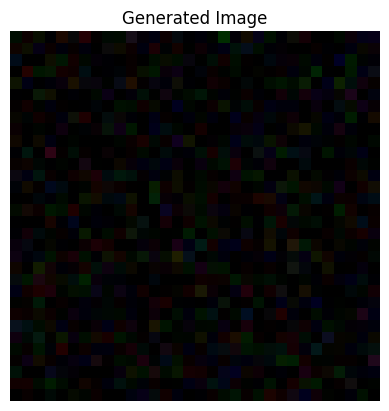

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Generated Image Saved!


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torchvision.utils import make_grid
from diffusers import StableDiffusionPipeline
import clip
from PIL import Image

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load Data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

# Initialize Models
cnn = CNN().to(device)
rnn = RNN(input_size=32, hidden_size=128, output_size=10).to(device)
generator = Generator().to(device)
discriminator = Discriminator().to(device)

# Loss & Optimizers
criterion = nn.CrossEntropyLoss()
optimizer_cnn = optim.Adam(cnn.parameters(), lr=0.001)
optimizer_rnn = optim.Adam(rnn.parameters(), lr=0.001)
optimizer_gen = optim.Adam(generator.parameters(), lr=0.0002)
optimizer_disc = optim.Adam(discriminator.parameters(), lr=0.0002)

# Train CNN & Track Accuracy
train_model(cnn, train_loader, criterion, optimizer_cnn, epochs=15)

# Generate Images
generate_image()  # GAN Image
generate_clip_image("A cricketer hitting six out of the ground")  # CLIP + Diffusion Image
